In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Virtex UltraScale+ FPGAs

## MAC - Multiply Accumulates

$$\text{Number of computations per sec} = \text{Frequency Bandwidth} \times \frac{(2Nants)*(2Nants+1)}{2} \times 6$$

<IPython.core.display.Javascript object>


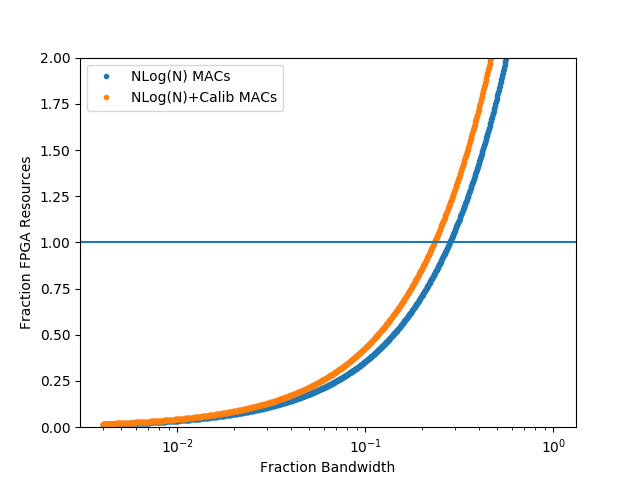

In [27]:
# # Virtex UltraScale+
# mac = 21897e9
# ram = 60e6
# io = 80e9

# Kintex 7 (SNAP)
mac = 2845e9
ram = 34
io = 80e9

# N^2 correlator
bw = 250e6
nants = 350
npols = 2
bits_per_csample = 8

fq_range = np.logspace(np.log10(1e6),np.log10(250e6),num=1024)
n_2_comp = fq_range * 4 * nants * (2*nants + 1)

# Nlog(N) correlator
nlogn_comp = fq_range * 4 * (4*nants) * np.log(4*nants)

# Nlog(N) + N correlator + calibrator
nlogn_n_comp = (fq_range * 4 * (4*nants) * np.log(4*nants)) + (fq_range * 3*2*nants * 4)

plt.figure()
plt.ylabel('Fraction FPGA Resources')
plt.xlabel('Fraction Bandwidth')
#plt.plot(fq_range/250e6, n_2_comp/mac, '.', label='N^2 MACs')
plt.semilogx(fq_range/250e6, nlogn_comp/mac, '.', label='NLog(N) MACs')
plt.semilogx(fq_range/250e6, nlogn_n_comp/mac, '.', label='NLog(N)+Calib MACs')
plt.axhline(1)
#plt.axvline(384*250/8192.,color='k')
plt.ylim([0,2])
plt.legend()

## RAM

Naively, the amount of onboard RAM required is proportional to the memory required to store the data required for computation. **Jack says cross correlation products are stored on off-chip memory based on the windowed xengine block**. The documentation for the windowed Xengine is not super clear but Jack says they propose integrating small chunks of high bandwidth data so it can be stored on a low bandwidth, high capacity off-ship memory.

In [ ]:
n_2_ram = 2*nants*